在处理彩色图片之前，我们需要重写一个能够处理三通道图片的类

In [16]:
import sys
sys.path.append("../")
import npccv.fft as nft
import npccv.utils as utils
import numpy as np

class FFT_3C:
    """
    承担傅里叶变换后的一些高低通滤波任务
        示例:
            fimg = FFT_3C(img)
            fimg.highpass(15,type="gauss"),
    """
    def __init__(self,img):
        """
            img:tpye->numpy array,more channels
        """
        self.img = img
        self.H,self.W,self.C = img.shape
        self.ffts = [nft.fftimg(img[:,:,c]) for c in range(self.C)]
        self.fft = utils.OC2TC(img,lambda img,i:nft.FFT2(img,depart=False))
        self.stm,self.pse = np.abs(self.fft),np.angle(self.fft)
        self.powerMtx = None
        self.power = None

    def PowerMtx(self):
        pass

    def Power(self):
        """
        图像总功率
        """
        return np.sum(np.abs(self.fft) ** 2)

    def lowpass(self,d0 = 30,type = "ideal",n = 2,setRes = False):
        """
        frequency domain filtering
        频域滤波器
        d0:截止半径
        type:默认理想低通滤波器,其他有"butterworth"、"gauss"
        lowpass:
        setRes:调用函数后是否立即改变对象内置的原始图像,默认为False
        """
        res = np.zeros_like(self.img)

        for c in range(self.C):
            res[:,:,c] = self.ffts[c].lowpass(d0,type,n,setRes)

        if setRes:
            self.img = res

        return res

    def highpass(self,d0 = 30,type = "ideal",n = 2,setRes = False):
        """
        frequency domain filtering
        频域滤波器
        d0:截止半径
        type:默认理想低通滤波器,其他有"butterworth"、"gauss"
        lowpass:
        setRes:调用函数后是否立即改变对象内置的原始图像,默认为False
        """

        res = np.zeros_like(self.img)

        for c in range(self.C):
            res[:,:,c] = self.ffts[c].highpass(d0,type,n,setRes)

        if setRes:
            self.img = res

        return res

    def homomorphic(self,yh,yl,d0,c=1,setRes = False):
        
        res = np.zeros_like(self.img)

        for c in range(self.C):
            res[:,:,c] = self.ffts[c].homomorphic(yh,yl,d0,c,setRes)

        if setRes:
            self.img = res

        return res


    def retinex(self,gc,setRes = False):
        res = np.zeros_like(self.img)

        for c in range(self.C):
            res[:,:,c] = self.ffts[c].retinex(gc,setRes)

        if setRes:
            self.img = res

        return res


    def FSD(self):
        """
            返回频谱,频域,用于绘图
        """
        res = np.fft.fftshift(self.fft)

        stm = np.log(np.abs(res))
        pse = np.angle(res)

        return  stm,pse


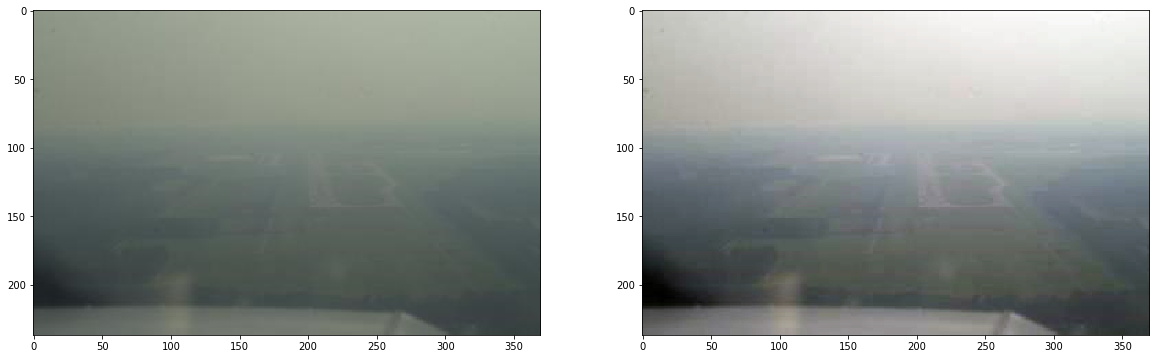

In [17]:
img = utils.read('../imgs/c2-2/retinex1.jpg')
fimg = FFT_3C(img)
stm,pse = fimg.FSD()

funcs = [
        lambda img:img,
        lambda img:fimg.retinex(100),
    ]
utils.compare(img,funcs,cmap=None)

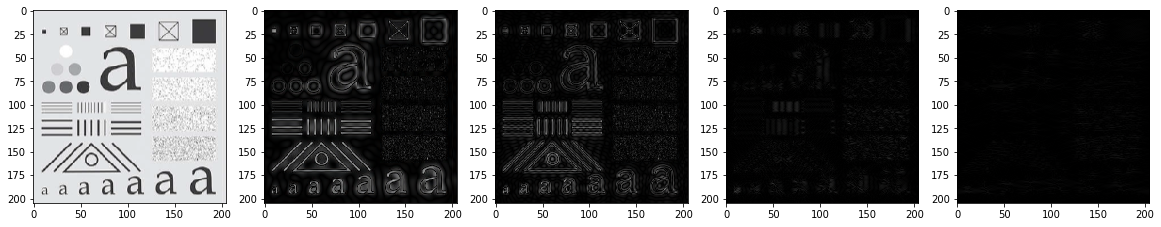

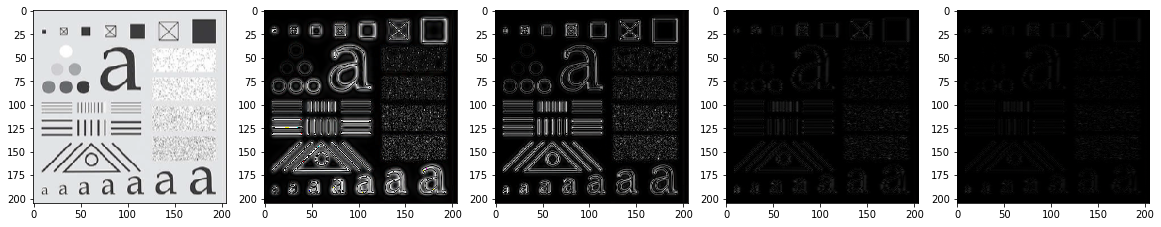

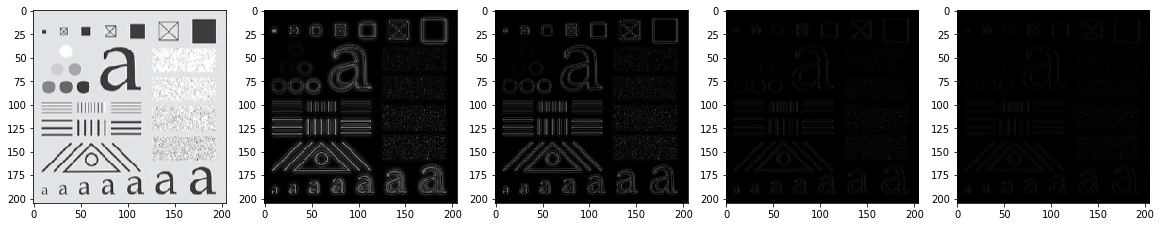

In [18]:
rimg = utils.read('../imgs/c2-2/lpf1.png')
fimg = FFT_3C(rimg)
stm,pse = fimg.FSD()

funcs = [
        lambda img:img,
        lambda img:fimg.highpass(15),
        lambda img:fimg.highpass(30),
        lambda img:fimg.highpass(80),
        lambda img:fimg.highpass(100)
    ]
utils.compare(rimg,funcs,cmap = None)


funcs = [
        lambda img:img,
        lambda img:fimg.highpass(15,type="butterworth"),
        lambda img:fimg.highpass(30,type="butterworth"),
        lambda img:fimg.highpass(80,type="butterworth"),
        lambda img:fimg.highpass(100,type="butterworth")
    ]
utils.compare(rimg,funcs,cmap = None)

funcs = [
        lambda img:img,
        lambda img:fimg.highpass(15,type="gauss"),
        lambda img:fimg.highpass(30,type="gauss"),
        lambda img:fimg.highpass(80,type="gauss"),
        lambda img:fimg.highpass(100,type="gauss")
    ]
utils.compare(rimg,funcs,cmap = None)